In [2]:
import os
import cv2
from hand_tracker_3D import HandTracker
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
%matplotlib inline
import pickle
import pandas as pd

In [3]:
# 模型相关初始化
palm_model_path = ".\\models\\palm_detection.tflite"
landmark_model_path = ".\\models\\hand_landmark_3d.tflite"
anchors_path = ".\\data\\anchors.csv" 
# box_shift determines 
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

hand tracker 3d built ok


In [7]:
# 视频相关初始化
indir = 'D:\\jester\\data\\12555'
filelist = os.listdir(indir)
fps = 12 # 帧率
outpath = 'test.avi' # 视频输出位置
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
# firstpic = cv2.imread(path+'\\'+filelist[0])
# size = (firstpic.shape[1], firstpic.shape[0]) # 视频分辨率
size = (256, 256)

In [ ]:
video = cv2.VideoWriter(filename=outpath, fourcc=fourcc, fps=fps, frameSize=size)
 
for item in filelist:
    item = indir + '\\' + item 
    img = cv2.imread(item)
    img = cv2.resize(img,(256,256))
    
    kp, box, conf = detector(img[:,:,::-1])
    
    if kp is None or conf < 1e-4:
        pass
    else:
        print(conf)
        f,ax = plt.subplots(1,1, figsize=(10, 10))
        ax.imshow(img)
        ax.scatter(kp[:,0], kp[:,1])
        from matplotlib.lines import Line2D
        # 加线条
        for finger_index in range(5):
            start = finger_index * 4 + 1
            ax.add_line(Line2D((kp[0][0],kp[start][0]), (kp[0][1],kp[start][1]), linewidth=1, color='blue'))
            for k in range(start, start+3):
                ax.add_line(Line2D((kp[k][0],kp[k+1][0]), (kp[k][1],kp[k+1][1]), linewidth=1, color='blue'))
        f.canvas.draw()
        data = np.fromstring(f.canvas.tostring_rgb(), dtype=np.uint8) 
        data = data.reshape(f.canvas.get_width_height()[::-1] + (3,)) 
        video.write(data)

video.release() #释放

C:\Users\zys98\Anaconda3\envs\ht-1\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


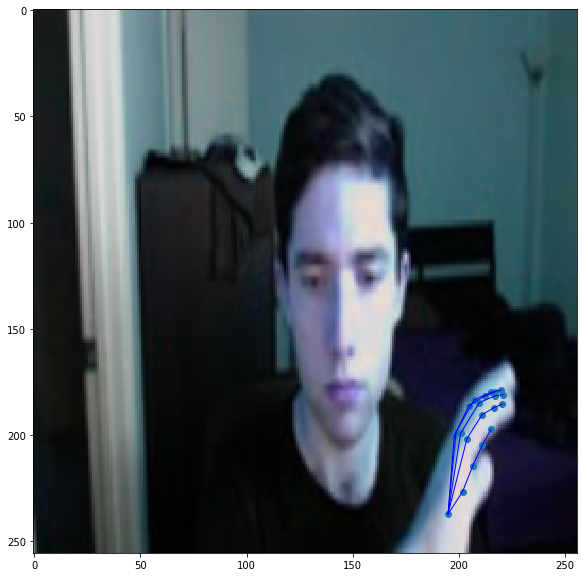

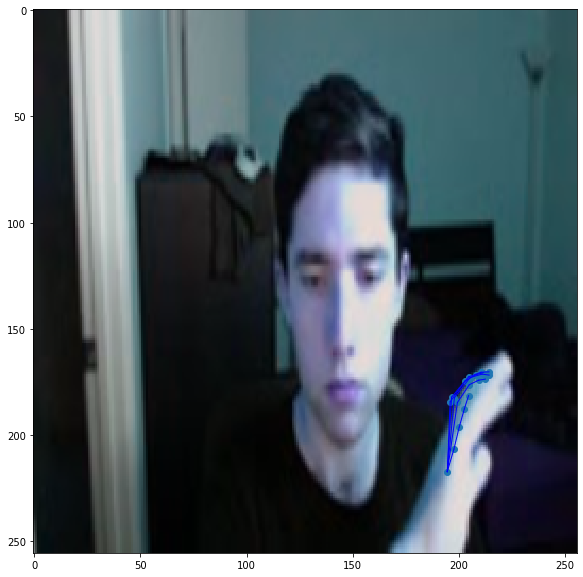

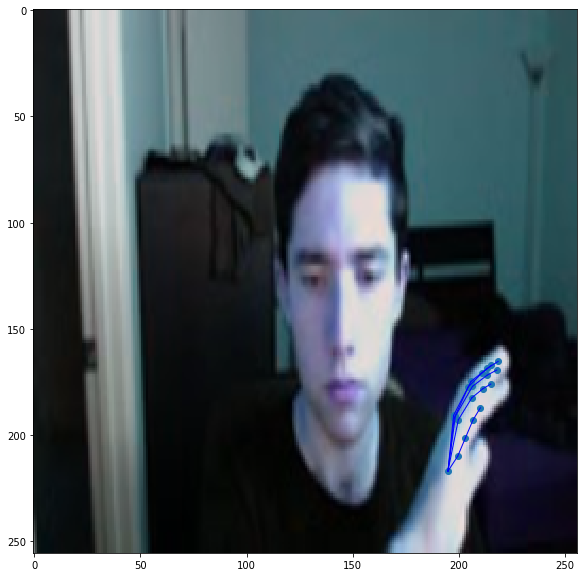

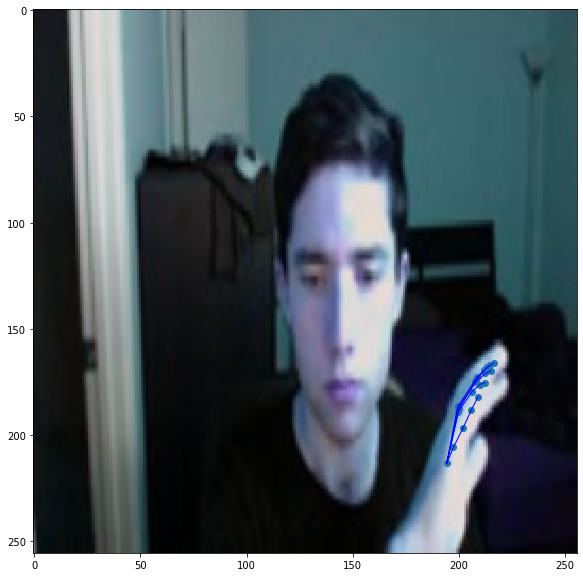

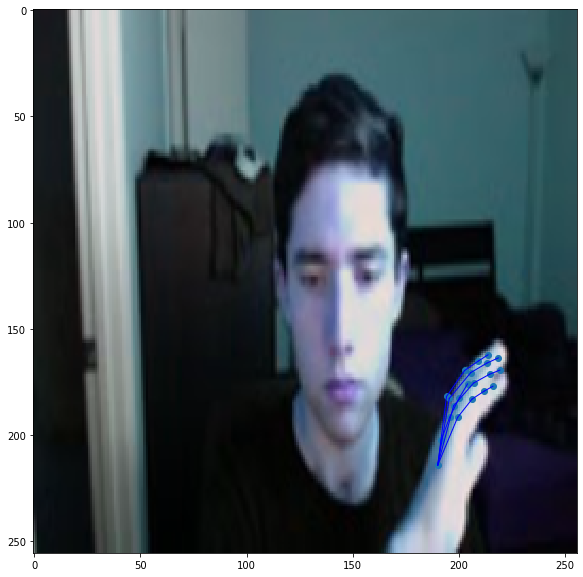

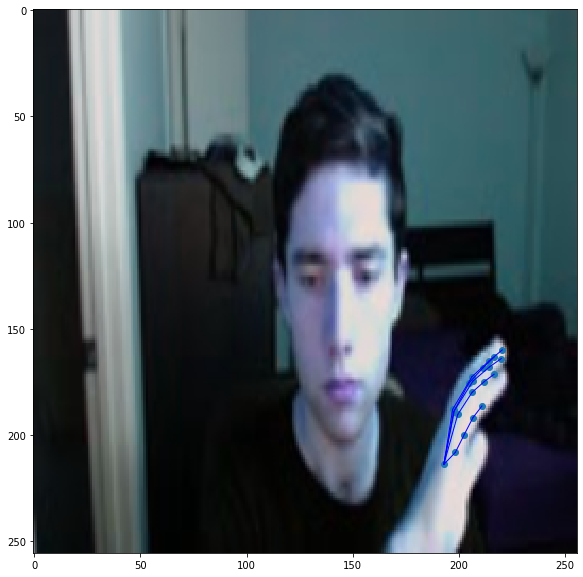

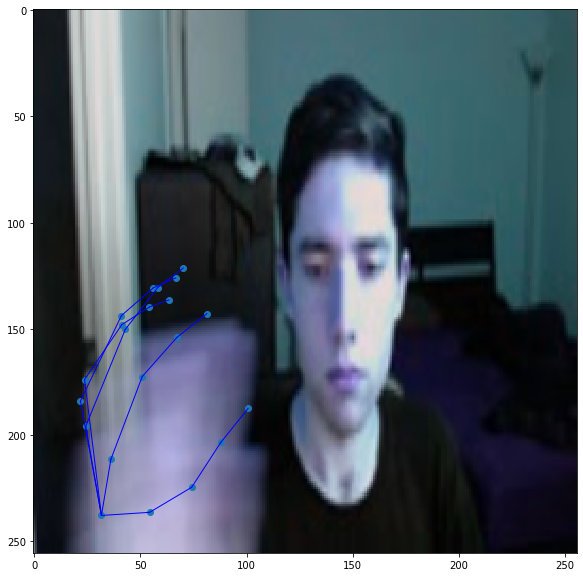

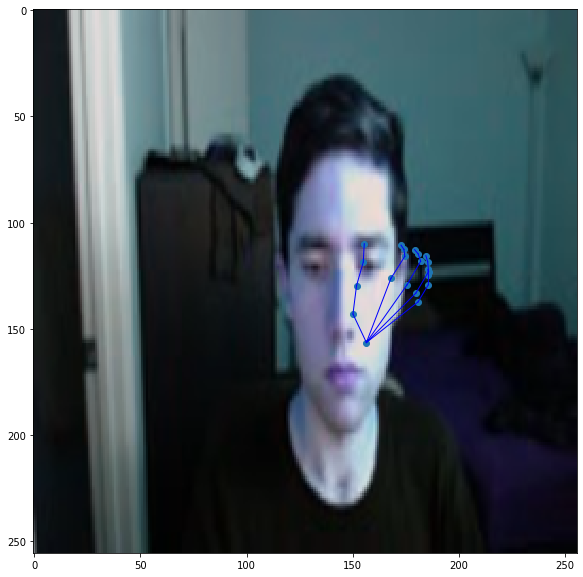

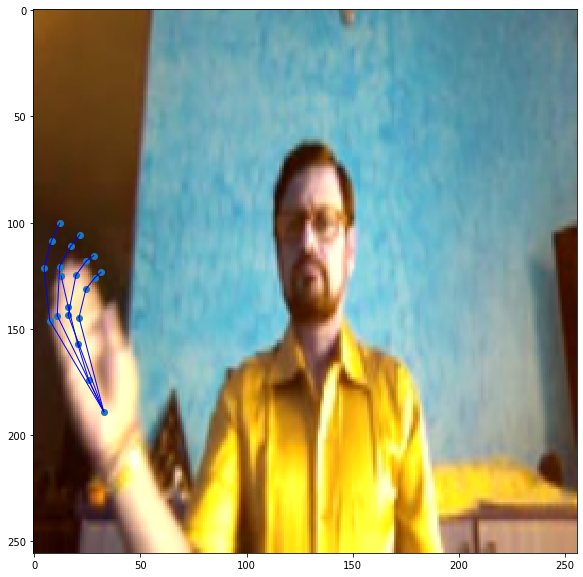

In [13]:
# 用现存数据渲染

train_output_fn = 'C:\\Users\\zys98\\Desktop\\graduation\\github-repo\\sk_dd_2019\\codes\\data\\JESTER\\train_3d.pkl'
Train = pickle.load(open(train_output_fn, "rb"))

root_dir = 'D:\\jester\\'
data_dir = 'D:\\jester\\data\\'
label_fn = 'jester-v1-labels.csv'
train_fn = 'jester-v1-train.csv'
test_fn = 'jester-v1-test.csv'
valid_fn = 'jester-v1-validation.csv'

train_data = pd.read_csv(root_dir + train_fn, sep=';')
train_dict = dict(zip(train_data.index, train_data.id))

video_dir = 'D:\\jester\\video\\'

count = 0

for i in range(len(Train['label'])):
    filelist = os.listdir('D:\\jester\\data\\' + str(train_dict[i]))
    frames = Train['pose'][i]
    frames = frames.reshape((-1,21,3))
    label = Train['label'][i]
    if label != 2:
        continue
    fname = video_dir+str(i)+'.avi'
    video = cv2.VideoWriter(filename=fname, fourcc=fourcc, fps=fps, frameSize=(256, 256))
    filecount = 0
    for frame in frames:
        path = 'D:\\jester\\data\\' + str(train_dict[i]) + '\\' + filelist[filecount]
        img = cv2.imread(path)
        img = cv2.resize(img, (256, 256))
        filecount += 1
        if frame[0][0] == 0:
            pass
        else:
            kp = frame
            f,ax = plt.subplots(1,1, figsize=(10, 10))
            ax.imshow(img)
            ax.scatter(kp[:,0], kp[:,1])

            # 加线条
            from matplotlib.lines import Line2D
            for finger_index in range(5):
                start = finger_index * 4 + 1
                ax.add_line(Line2D((kp[0][0],kp[start][0]), (kp[0][1],kp[start][1]), linewidth=1, color='blue'))
                for k in range(start, start+3):
                    ax.add_line(Line2D((kp[k][0],kp[k+1][0]), (kp[k][1],kp[k+1][1]), linewidth=1, color='blue'))
            f.canvas.draw()
            data = np.fromstring(f.canvas.tostring_rgb(), dtype=np.uint8) 
            data = data.reshape(f.canvas.get_width_height()[::-1] + (3,)) 
            video.write(data)

    video.release()
    count += 1
    if count >= 2:
        break
    

In [ ]:
import os
from tqdm import tqdm
import cv2


self_video_root = 'C:\\Users\\zys98\\Desktop\\self\\all\\'
self_output_path = 'C:\\Users\\zys98\\Desktop\\graduation\\github-repo\\sk_dd_2019\\codes\\data\\JESTER\\myskel.pkl'

# self_video_skel_list = dict()

try:
    self_video_skel_list = pickle.load(open(self_output_path, "rb")) # 先加载一波旧数据
except:
    self_video_skel_list = dict()

    
print(self_video_skel_list.keys())


self_video_files = os.listdir(self_video_root)
print(self_video_files)

for fn in tqdm(self_video_files):
    
    if fn.split('.')[0] in self_video_skel_list:
        continue
        
    self_video_path = self_video_root + fn
    skel_list = []
    cap = cv2.VideoCapture(self_video_path)
    while(1):
        success, frame = cap.read()
        if not success:
            break
        frame = cv2.resize(frame,(256,256))
        kp, box, conf = detector(frame)

        if kp is None or conf < 1e-6:
            continue

        skel_list.append(kp)
    cap.release()
    self_video_skel_list[fn.split('.')[0]] = skel_list


pickle.dump(self_video_skel_list, open(self_output_path, "wb"))

In [ ]:
print(list(self_video_skel_list.keys()))

In [9]:
# 将自己的视频加工成骨架数据并保存到 sk_dd_2019 的数据目录
# 同时保存一份渲染视频
self_video_path = 'C:\\Users\\zys98\\Desktop\\self\\1r.mp4'
output_video_path = 'C:\\Users\\zys98\\Desktop\\out.mp4'
skel_output_path = 'C:\\Users\\zys98\\Desktop\\graduation\\github-repo\\sk_dd_2019\\codes\\data\\JESTER\\myskel.pkl'
video_flag = False # 是否生成视频

skel_list = []


cap = cv2.VideoCapture(self_video_path)
if video_flag:
    video = cv2.VideoWriter(filename=output_video_path, fourcc=fourcc, fps=fps, frameSize=(256, 256))
while(1):
    success, frame = cap.read()
    if not success:
        break
    frame = cv2.resize(frame,(256,256))
    kp, box, conf = detector(frame)
    
    if kp is None or conf < 1e-6:
        continue
        
    skel_list.append(kp)

    # 绘图
    if video_flag:
        f,ax = plt.subplots(1,1, figsize=(10, 10))
        ax.imshow(frame)
        ax.scatter(kp[:,0], kp[:,1])
        from matplotlib.lines import Line2D
        # 加线条
        for finger_index in range(5):
            start = finger_index * 4 + 1
            ax.add_line(Line2D((kp[0][0],kp[start][0]), (kp[0][1],kp[start][1]), linewidth=1, color='blue'))
            for k in range(start, start+3):
                ax.add_line(Line2D((kp[k][0],kp[k+1][0]), (kp[k][1],kp[k+1][1]), linewidth=1, color='blue'))
        f.canvas.draw()
        data = np.fromstring(f.canvas.tostring_rgb(), dtype=np.uint8) 
        data = data.reshape(f.canvas.get_width_height()[::-1] + (3,))
        video.write(data)

if video_flag:    
    video.release()  
cap.release()

pickle.dump(skel_list, open(skel_output_path, "wb"))